In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

color_palette = sns.color_palette("Pastel1") + sns.color_palette("Pastel2")
color_palette.append("indianred")

plt.style.use("fivethirtyeight")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
data = pd.read_csv("/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")

print(f"DATA'S DIMENSION: {data.shape}\n")
print(f"DATA'S NAN SUM: {data.isnull().sum().sum()}\n")
print(f"DATA'S DUPLICATE ROWS: ")
data.loc[data.duplicated(keep="first") == 1]

DATA'S DIMENSION: (4340, 8)

DATA'S NAN SUM: 0

DATA'S DUPLICATE ROWS: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [3]:
"""Inspects the number of unique values within each feature"""

pd.DataFrame(data.nunique().sort_values(ascending=False)).rename(columns={0:"unique_count"}).style.background_gradient("RdBu")

,unique_count
name,1491
km_driven,770
selling_price,445
year,27
fuel,5
owner,5
seller_type,3
transmission,2


> Only **1491 unique cars** are present, so several of the same cars must have been sold during different years

In [4]:
def pie(dataframe, feature, title, color_palette, n_largest=50, white_center_radius=.35):
    
    labels = dataframe[feature].value_counts().nlargest(n_largest).index
    values = dataframe[feature].value_counts().nlargest(n_largest).values
    plt.pie(values, labels=labels, shadow=True, colors=color_palette, autopct="%1.1f%%")
    plt.title(title)
    
    white_center = plt.Circle(xy=(0,0), radius=white_center_radius, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(white_center)

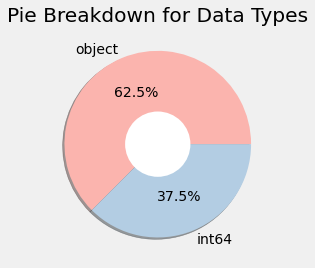

In [5]:
labels = data.dtypes.value_counts().index
values = data.dtypes.value_counts().values
plt.pie(values, labels=labels, shadow=True, colors=color_palette, autopct="%1.1f%%")
plt.title("Pie Breakdown for Data Types")
    
white_center = plt.Circle(xy=(0,0), radius=.35, fc="white")
fig = plt.gcf()
fig.gca().add_artist(white_center)
plt.show()

In [6]:
numData = data.select_dtypes(np.number).copy()
catData = data.select_dtypes(exclude=np.number).copy()

# Main Data Set's Analysis

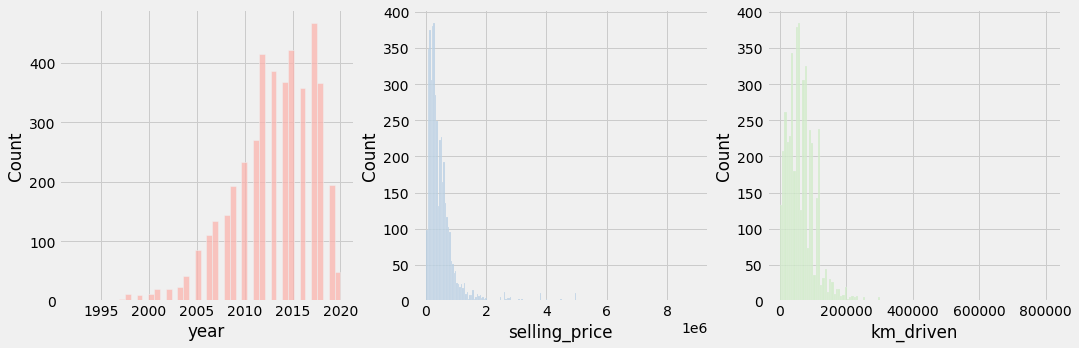

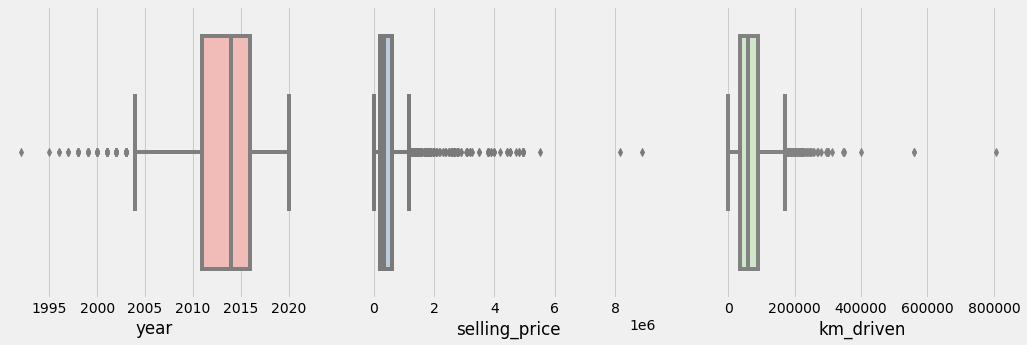

In [7]:
plt.figure(figsize=(16,5))
"""Histograms"""
for i,feature in enumerate(numData.columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data=numData, x=feature, color=color_palette[i])
plt.show()

plt.figure(figsize=(16,5))
"""Box plots"""
for i,feature in enumerate(numData.columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=numData, x=feature, color=color_palette[i])
plt.show()

> **Few cars** were on sale **prior** to the year **2000** 

> **selling_price** and **km_driven** distributions are **right skewed** with **many outliers**

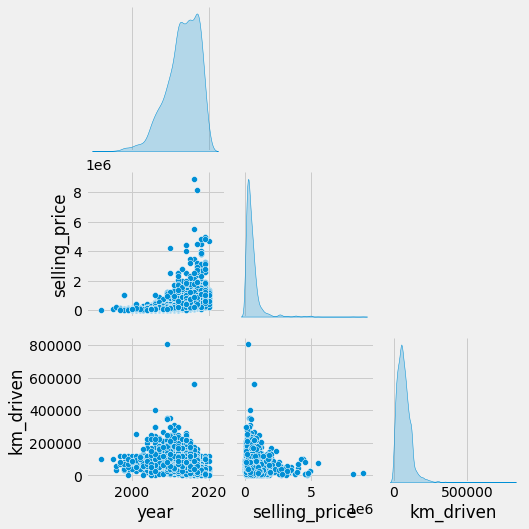

In [8]:
sns.pairplot(data=numData, diag_kind="kde", corner=True)
plt.show()

> **Newer** cars are **more expensive**

> Cars that have been **driven less** are **more expensive**

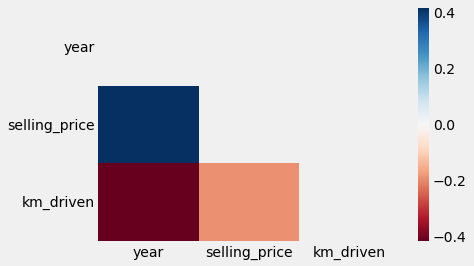

In [9]:
corrMatrix = numData.corr()
upper_triangle = np.triu(corrMatrix)

sns.heatmap(corrMatrix, mask=upper_triangle, cmap="RdBu")
plt.show()

> As expected, these correlation values would not seem too significant since they are Peason correlation, a measure which describes linear correlation and not any other behaviors

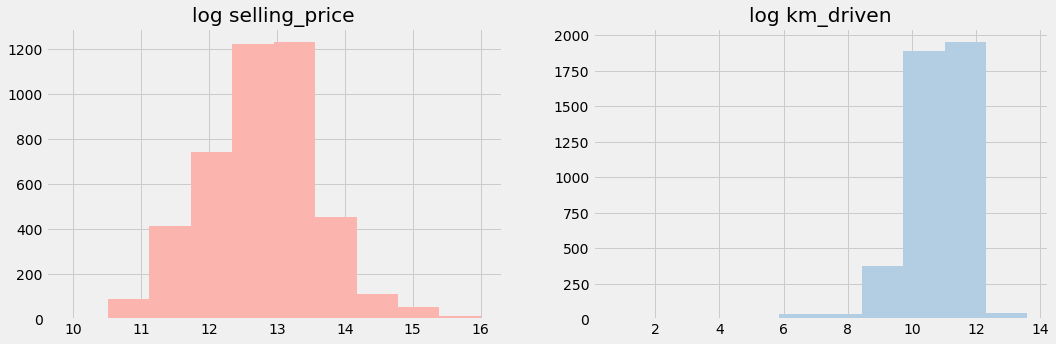

In [10]:
"""Applies log transform to skewed features"""

plt.figure(figsize=(16,5))
for i,feature in enumerate(("selling_price", "km_driven")):
    plt.subplot(1,2,i+1)
    np.log1p(numData[feature]).hist(color=color_palette[i])
    plt.title(f"log {feature}")
plt.show()

In [11]:
for feature in ("selling_price", "km_driven"): numData[f"log_{feature}"] = numData[feature].apply(lambda x: np.log1p(x))

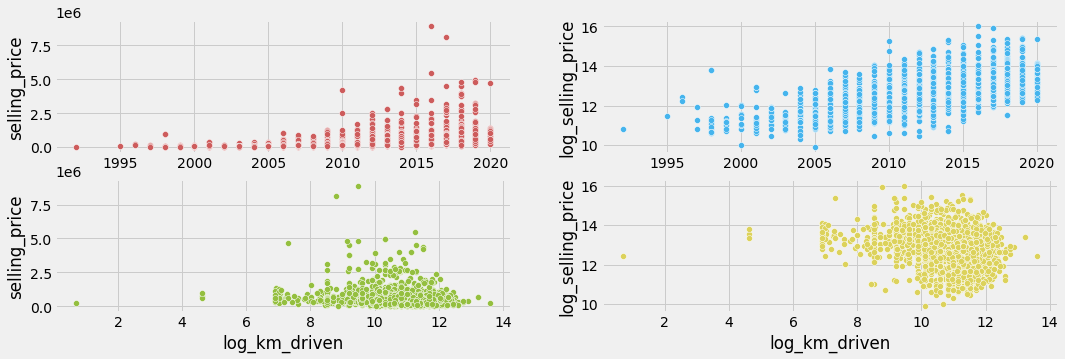

In [12]:
i = 0
plt.figure(figsize=(16,5))

for feature1,feature2 in [("year", "selling_price"), ("year", "log_selling_price"),
                          ("log_km_driven", "selling_price"), ("log_km_driven", "log_selling_price")]:
    plt.subplot(2,2,i+1)
    colors = ["indianred", "#45B4ED", "#94BF3F", "#DCD25B"]
    sns.scatterplot(data=numData, x=feature1, y=feature2, color=colors[i])
    i+=1
plt.show()

> **Newer** cars = more **expensive**

> Applying **log transform to km_driven** appear to have **masked** its **influenced on selling price**

# Exploring Categorical Data

In [13]:
catData.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


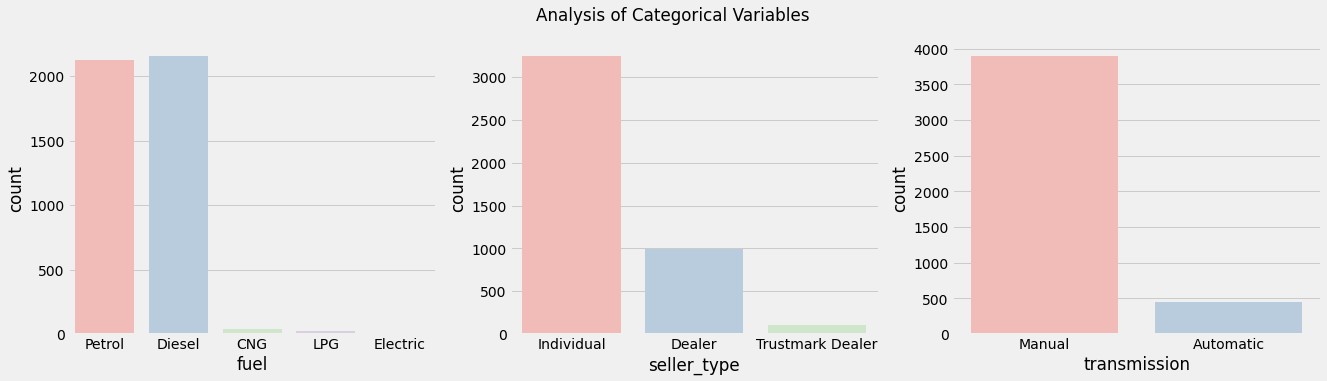

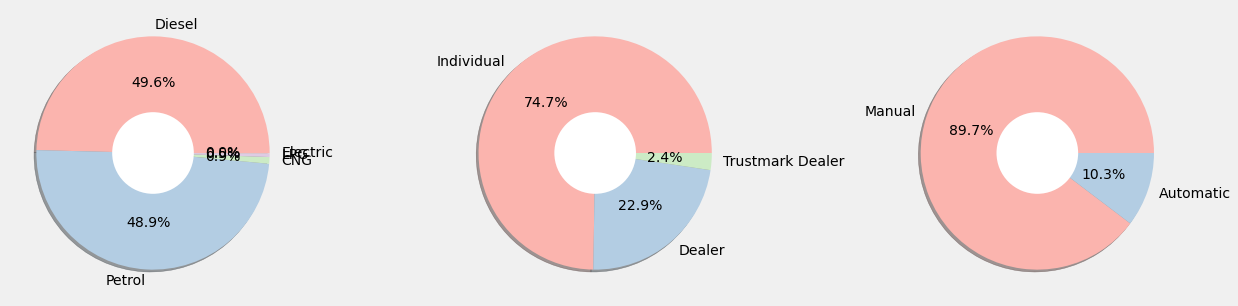

In [14]:
plt.figure(figsize=(20,5))
plt.suptitle("Analysis of Categorical Variables")

for i,feature in enumerate(catData.columns[1:-1]):
    plt.subplot(1,3,i+1)
    sns.countplot(data=catData, x=feature, palette=color_palette)
plt.show()

plt.figure(figsize=(20,5))
for i,feature in enumerate(catData.columns[1:-1]):
    plt.subplot(1,3,i+1)
    pie(dataframe=catData, feature=feature, color_palette=color_palette, title=None)
plt.show()

> Very **few electric vehicles**, and not many cars use **CNG or LPG**

> **Not many** seller_type are **"Trustmark Dealer"**

> The **dominant transmission type** is **Manual**

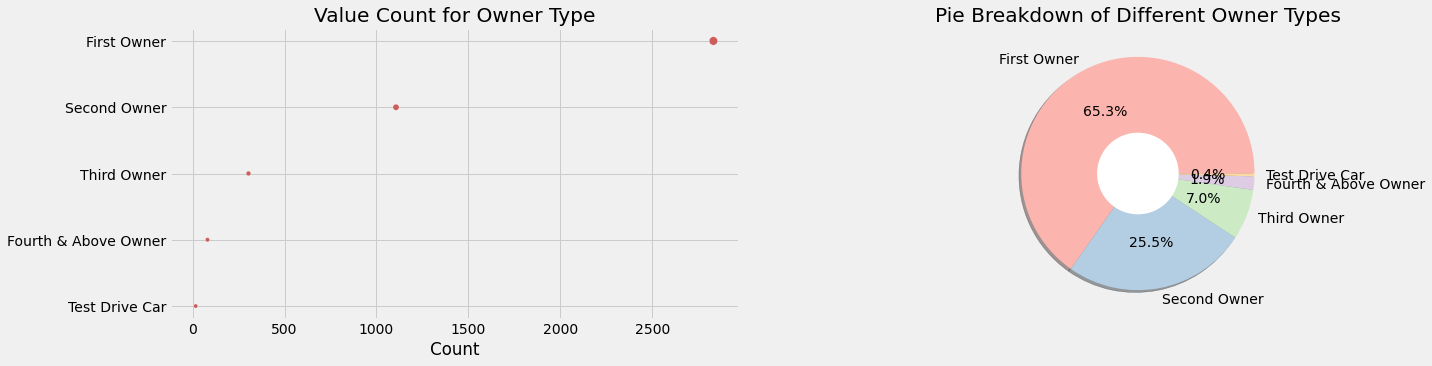

In [15]:
values = catData.owner.value_counts().values
labels = catData.owner.value_counts().index

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.scatterplot(y=labels, x=values, size=values, legend=False, color=color_palette[-1]).set(title="Value Count for Owner Type", xlabel="Count")
plt.subplot(122)
pie(catData, "owner", title="Pie Breakdown of Different Owner Types", color_palette=color_palette)
plt.show()

> **Not many "Test Drive Car" or "Fourth & Above Owner"**

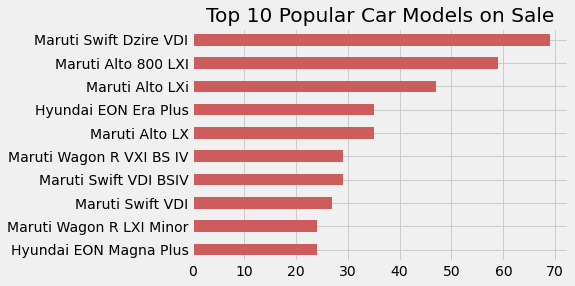

In [16]:
catData.name.value_counts().nlargest(10).sort_values().plot(kind="barh", color=color_palette[-1])
plt.title("Top 10 Popular Car Models on Sale")
plt.show()

**There appears to be a repetitiveness to these models. Let's extract the cars' brands!**

In [17]:
catData["brand"] = catData.name.apply(lambda model: model.split(" ")[0])

In [18]:
"""Frequency of car brands in the data set"""

pd.DataFrame(catData.brand.value_counts()).rename(columns={"brand":"count"}).style.background_gradient("RdBu")

,count
Maruti,1280
Hyundai,821
Mahindra,365
Tata,361
Honda,252
Ford,238
Toyota,206
Chevrolet,188
Renault,146
Volkswagen,107


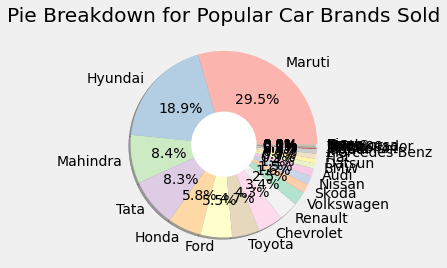

In [19]:
pie(catData, feature="brand", title="Pie Breakdown for Popular Car Brands Sold", color_palette=color_palette)

# Analysis on Main Data

In [20]:
data["brand"] = catData.brand.copy()

for feature in ("selling_price", "km_driven"): data[f"log_{feature}"] = data[feature].apply(lambda x: np.log1p(x))

In [21]:
data.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,log_selling_price,log_km_driven
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,11.002117,11.156265
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,11.813037,10.819798
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,13.304687,11.512935
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,12.429220,10.736418


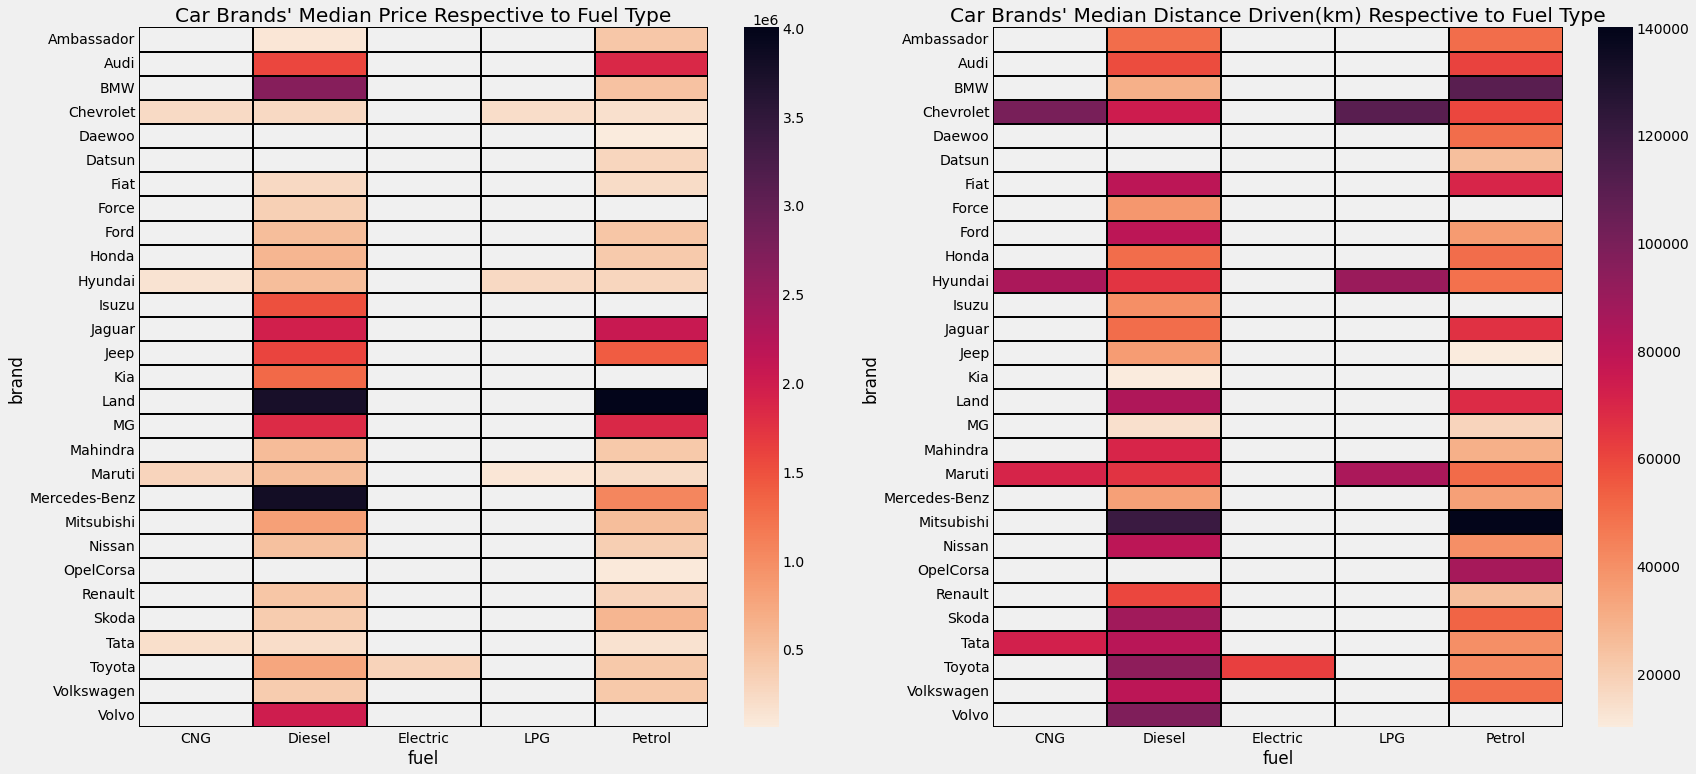

In [22]:
"""Assess the median price by comparing the fuel type with each car brand"""
FUEL_MATRIX = pd.pivot_table(data=data, index="brand", columns="fuel", values="selling_price", aggfunc="median")

"""Assess the median price by comparing the fuel type with each car brand"""
DISTANCE_MATRIX = pd.pivot_table(data=data, index="brand", columns="fuel", values="km_driven", aggfunc="median")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,12))
sns.heatmap(FUEL_MATRIX, cmap="rocket_r", linewidths=2, linecolor="black", ax=axes[0]).set(title="Car Brands' Median Price Respective to Fuel Type")
sns.heatmap(DISTANCE_MATRIX, cmap="rocket_r", linewidths=2, linecolor="black", ax=axes[1]).set(title="Car Brands' Median Distance Driven(km) Respective to Fuel Type")
plt.show()

> Amongst car models that use **Diesel**, **Land and Mercedes-Benz models** are the most **expensive** in this data set

> Amongst car models that use **Petrol**, **Land models** are the most **expensive** in this data set

> Amongst car models that use **Petrol**, **Mitsubishi models** were **driven the most** when they were put on sale

> **Not many cars use electricity, LPG, or CNG fuel types**

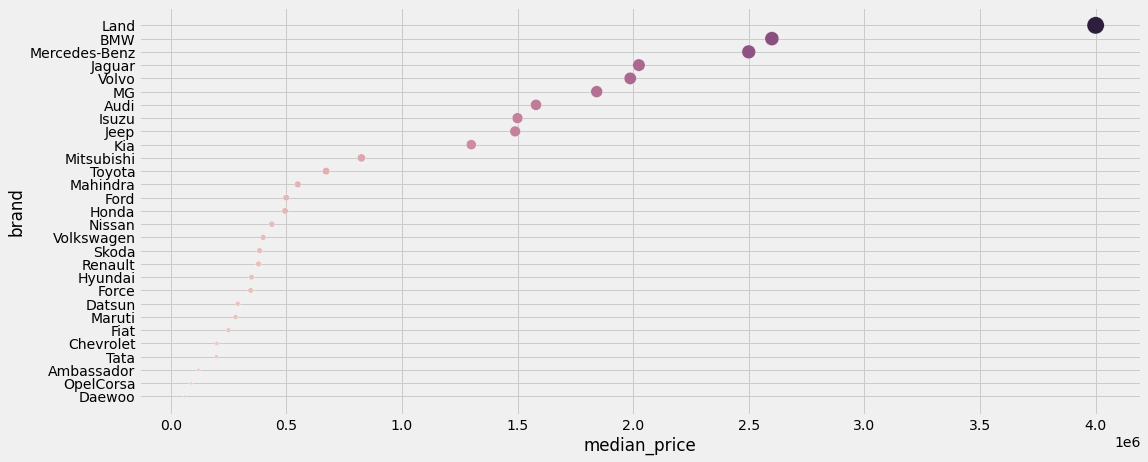

In [23]:
"""Assess the median selling price of the available car brands"""

cars_median_price = data.groupby("brand")["selling_price"].median().to_frame().rename(columns={"selling_price":"median_price"}).sort_values(by="median_price", ascending=False)

brands = cars_median_price.index
median_price = cars_median_price.median_price

plt.figure(figsize=(16,7))
sns.scatterplot(y=brands, x=median_price, size=median_price, sizes=(10, 300), hue=median_price, legend=False)
plt.show()

> **Land, BMW, and Mercedes-Benz** models are the **most expensive**

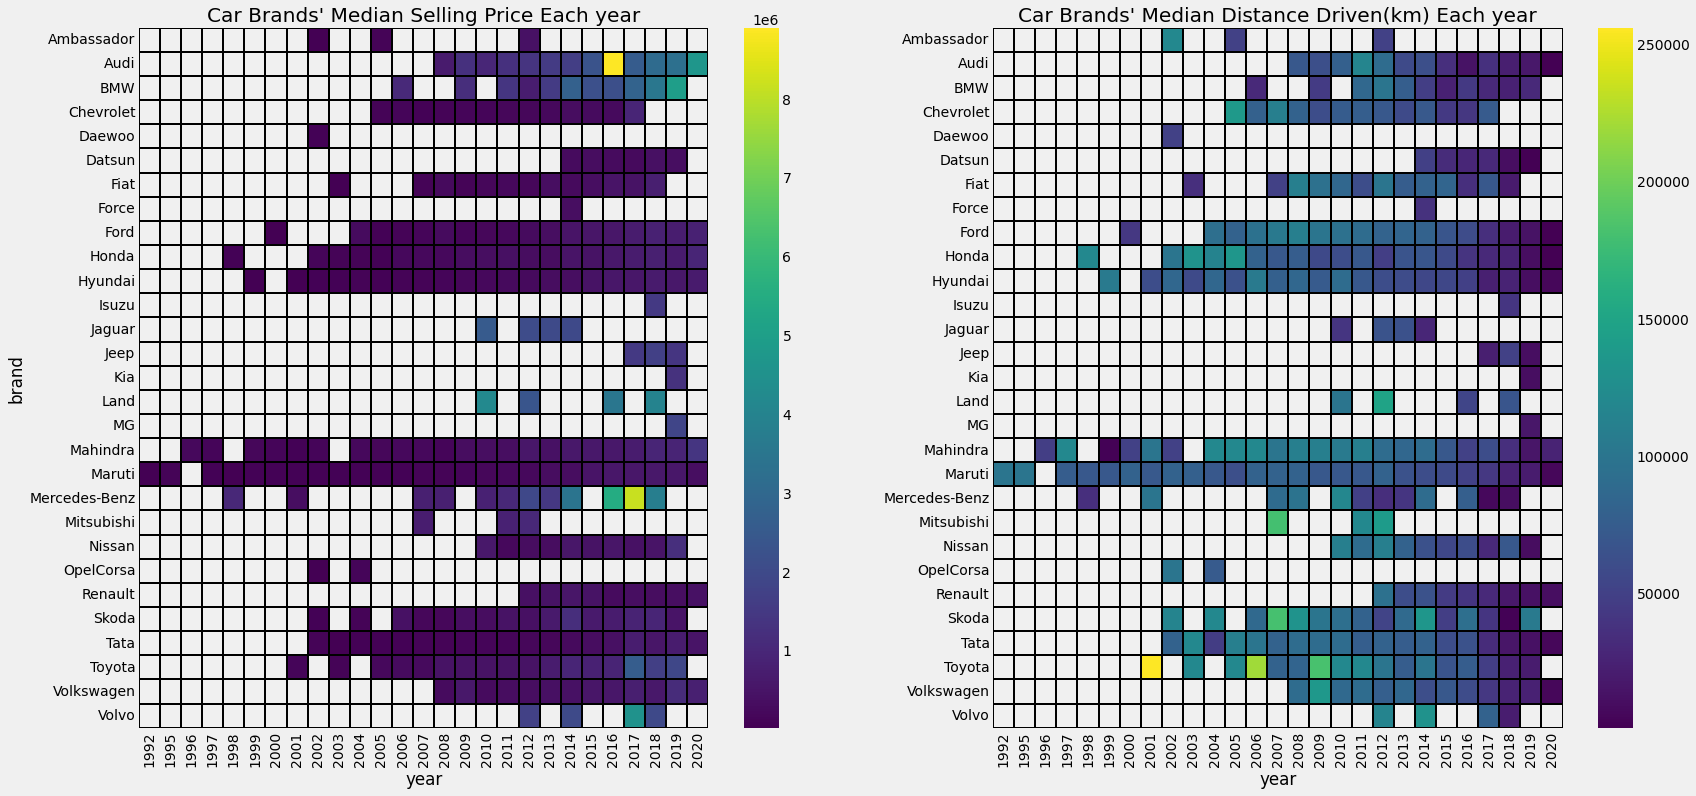

In [24]:
"""Assess how the selling price of each car brand changes with year"""
PRICE_MATRIX = pd.pivot_table(data=data, index="brand", columns="year", values="selling_price", aggfunc="median")

"""Assess how the distance driven of each car brand changes with year"""
DISTANCE_MATRIX = pd.pivot_table(data=data, index="brand", columns="year", values="km_driven", aggfunc="median")

fig, axes = plt.subplots(1,2,figsize=(25,12))
sns.heatmap(PRICE_MATRIX, cmap="viridis", linewidths=2, linecolor="black", ax=axes[0]).set(title="Car Brands' Median Selling Price Each year")
sns.heatmap(DISTANCE_MATRIX, cmap="viridis", linewidths=2, linecolor="black", ax=axes[1]).set(title="Car Brands' Median Distance Driven(km) Each year", ylabel=None)
plt.show()

> **Audi, Mercedes-Benz, and BMW vehicles' sale price are increasing every year**

> **Newer models on sale are driven less, in contrast to earlier models that are on sale**

The white tiles mean that the car model was not available during that specific year, thus no median price is available

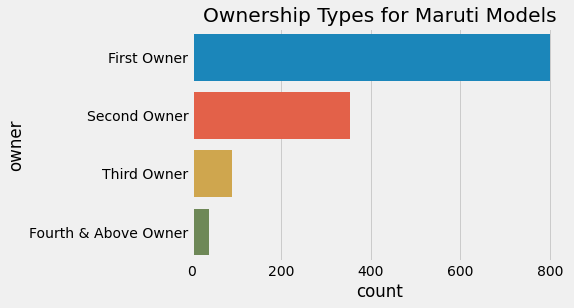

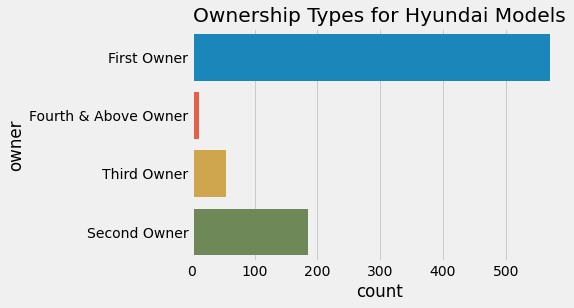

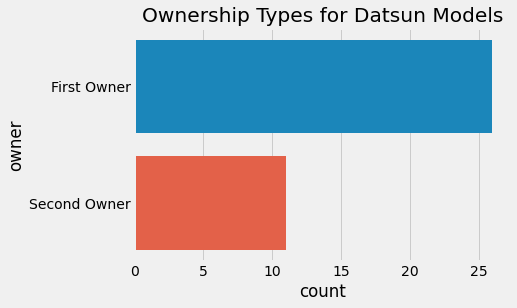

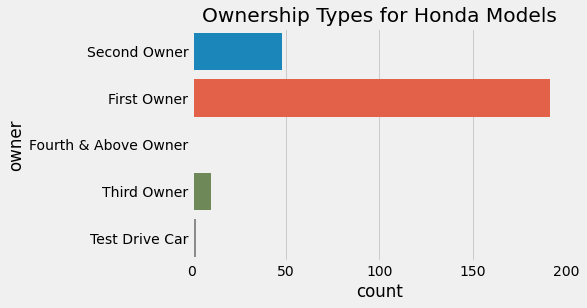

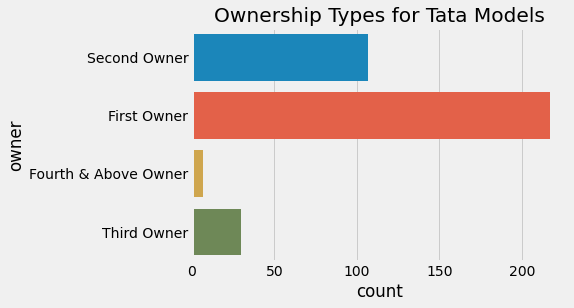

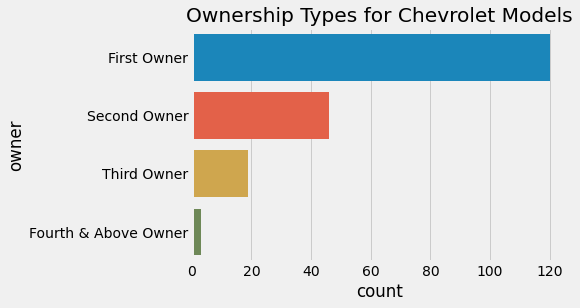

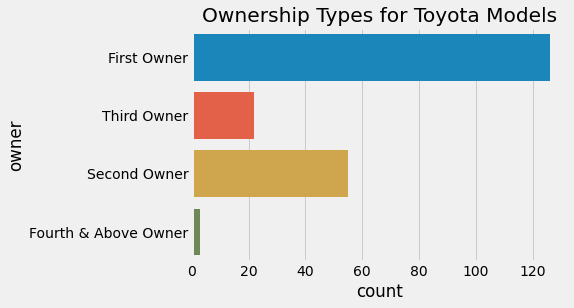

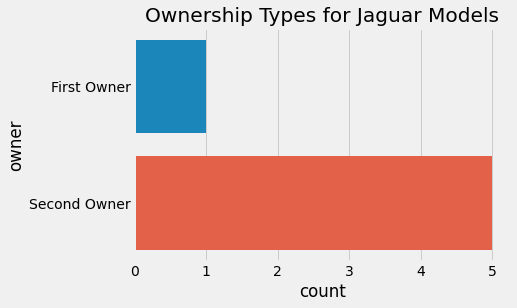

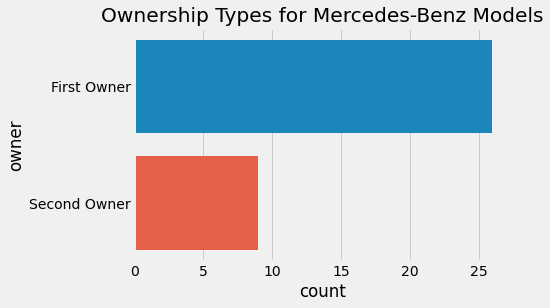

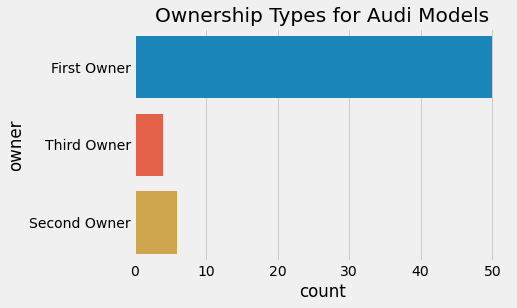

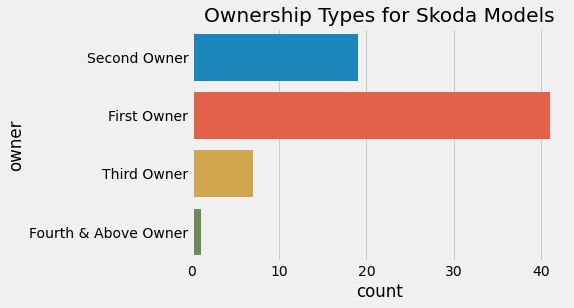

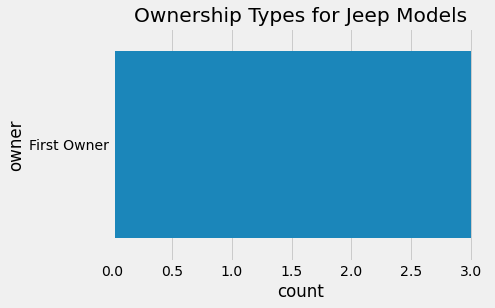

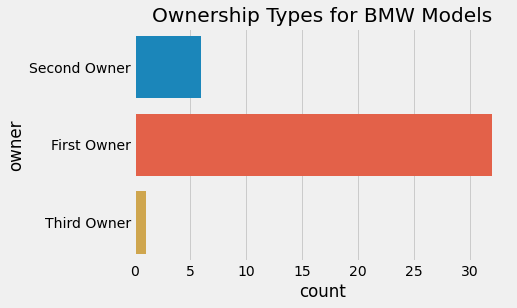

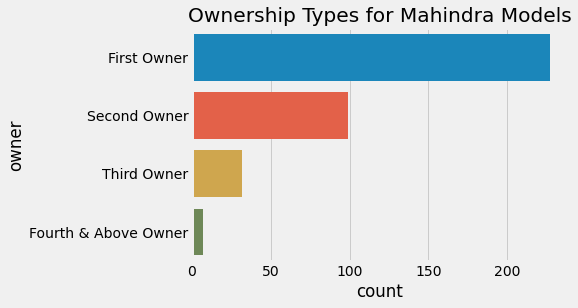

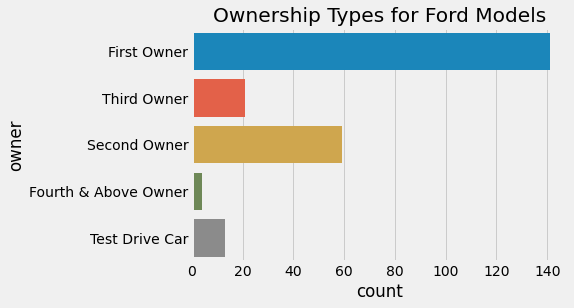

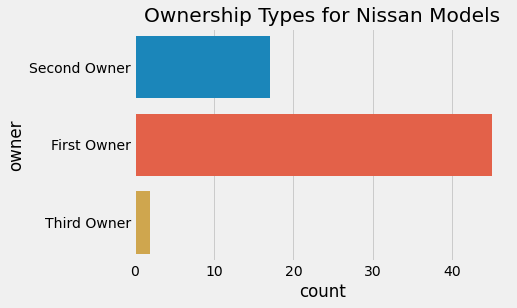

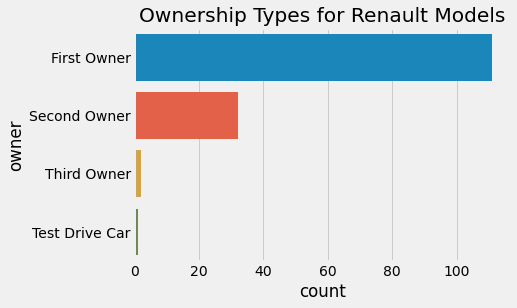

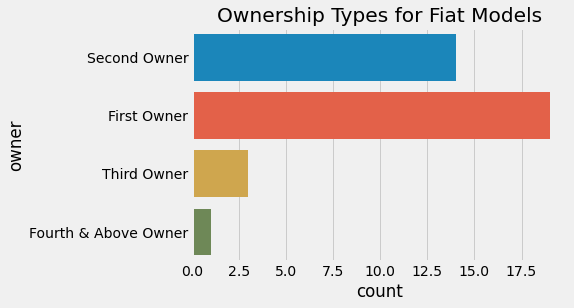

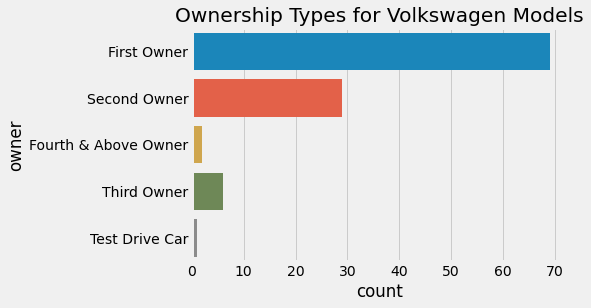

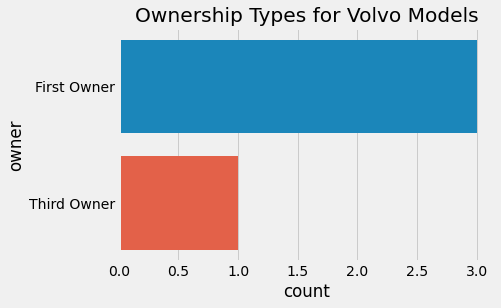

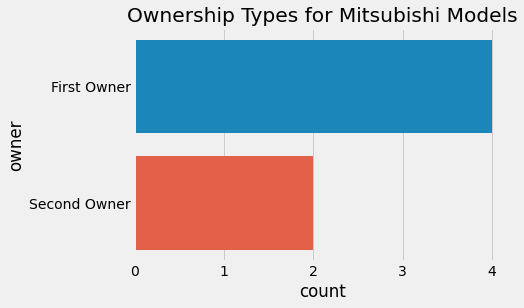

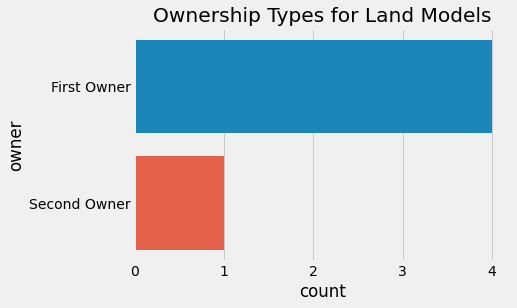

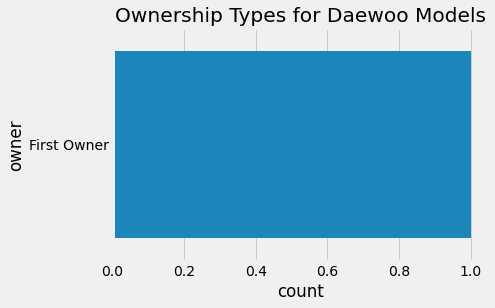

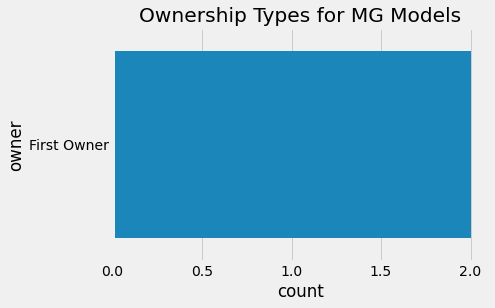

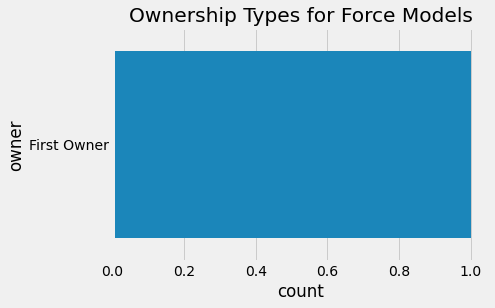

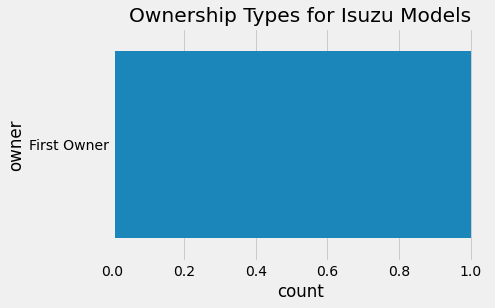

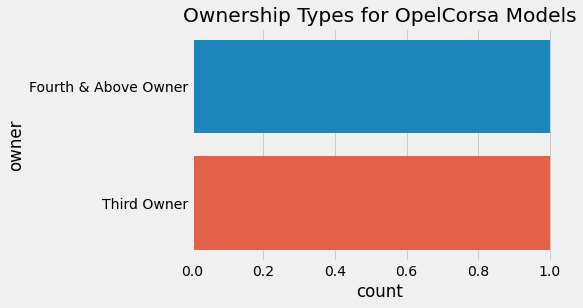

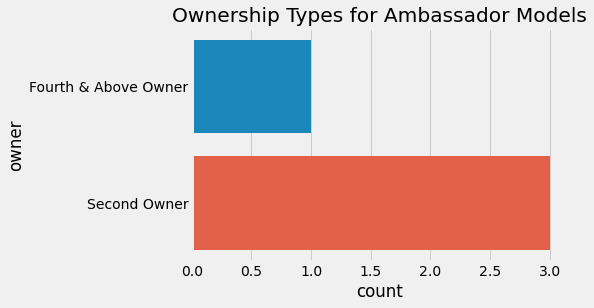

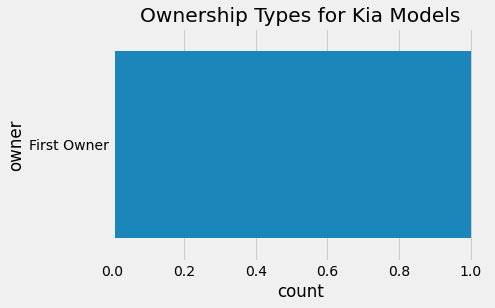

In [25]:
for i,car_model in enumerate(data.brand.unique()):
    plotting_data = data.loc[data.brand == car_model]
    sns.countplot(data=plotting_data, y="owner").set(title=f"Ownership Types for {car_model} Models")
    plt.show()

> **Most vehicles** are mostly owned by the **first owner**

> **Jaguar and Fiat models** are also popularly owned by second owners

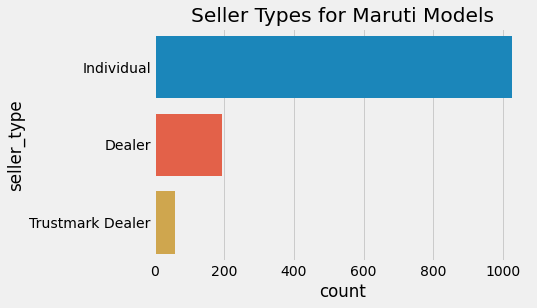

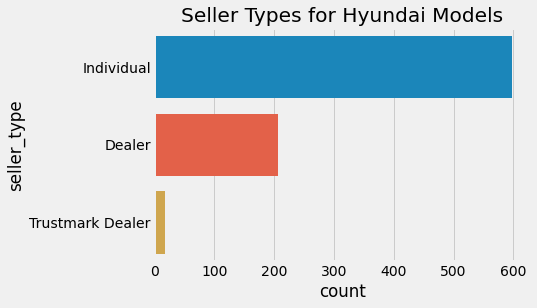

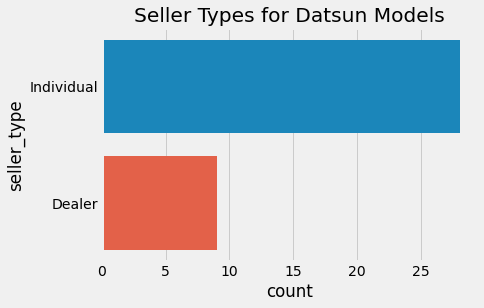

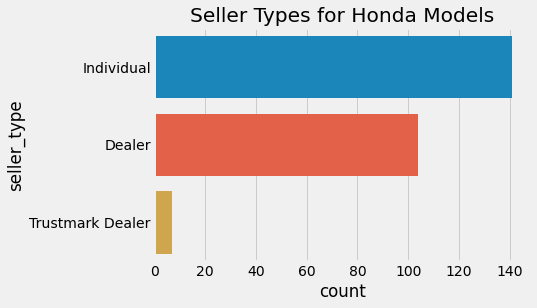

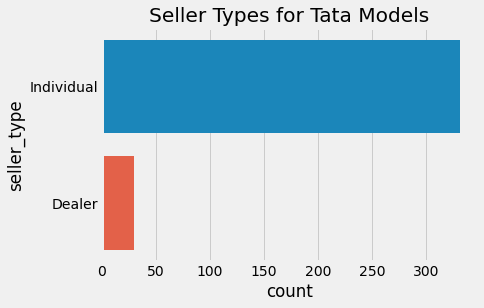

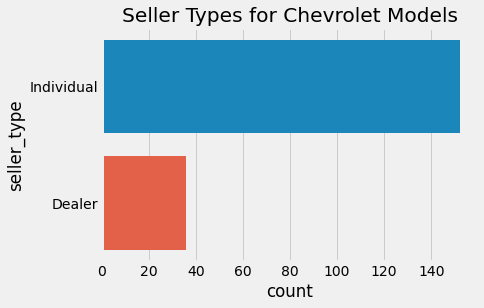

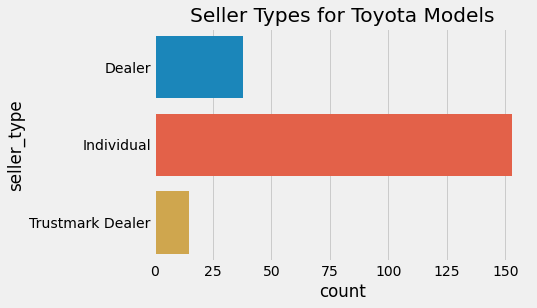

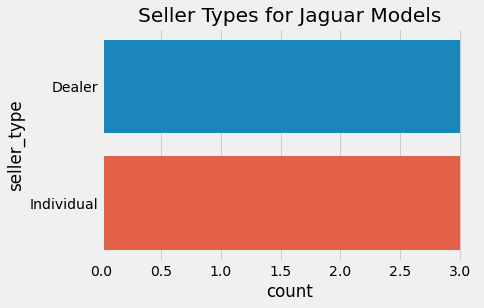

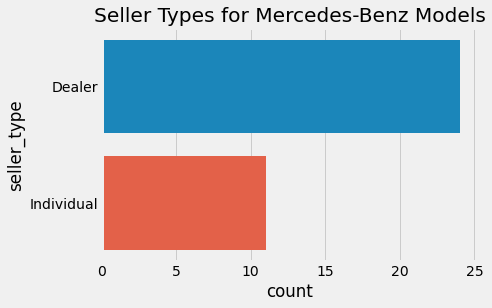

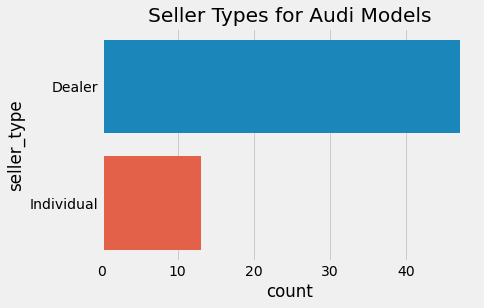

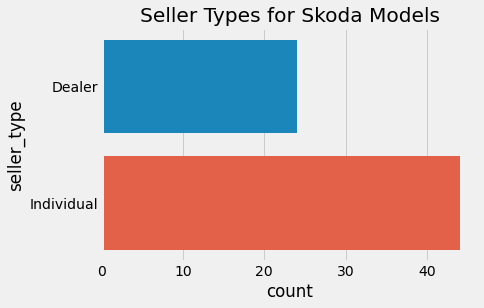

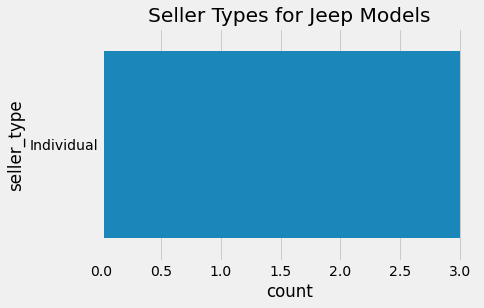

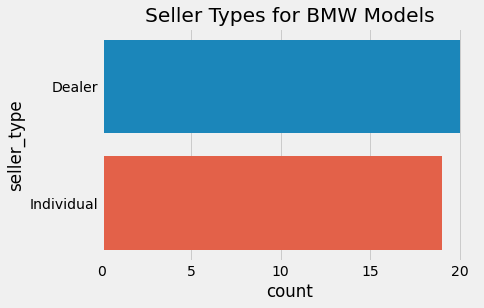

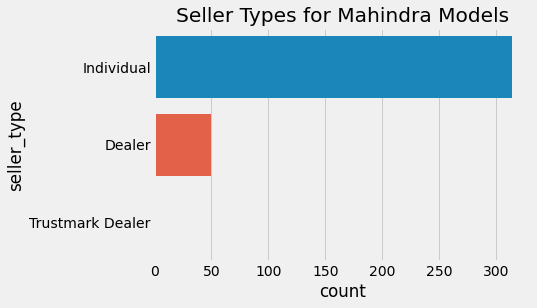

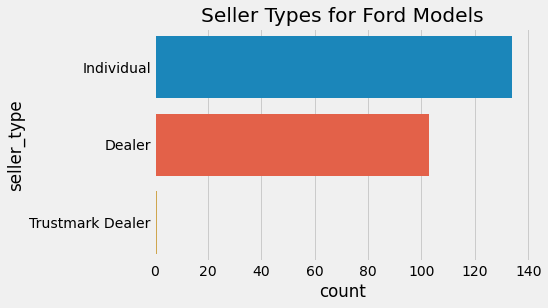

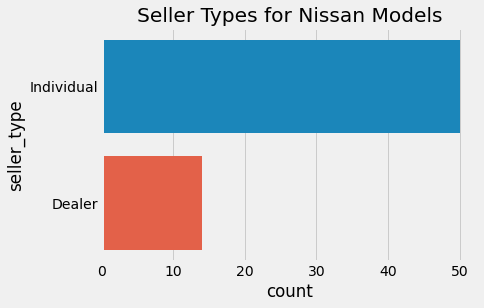

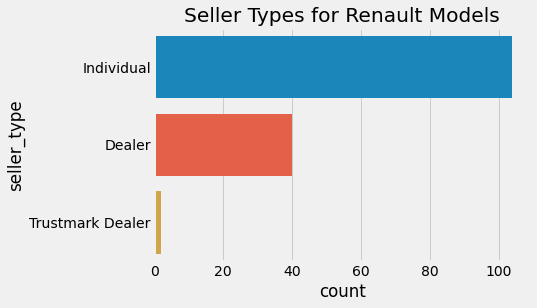

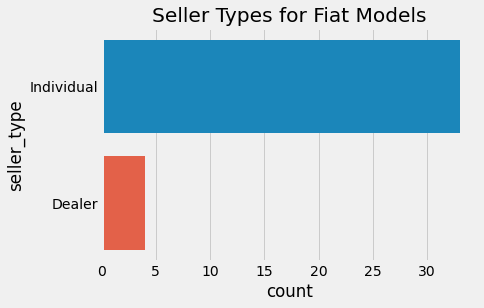

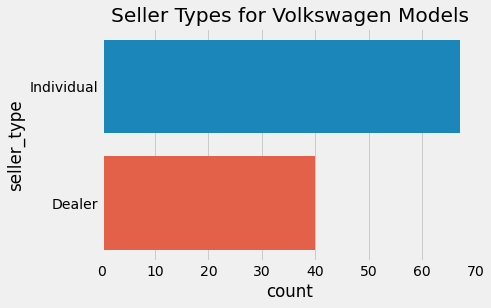

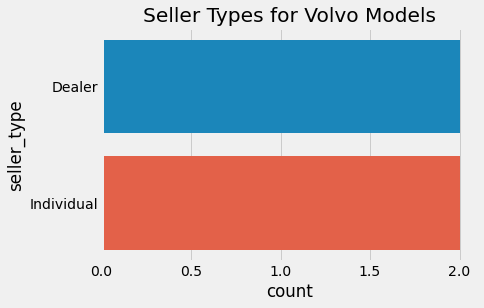

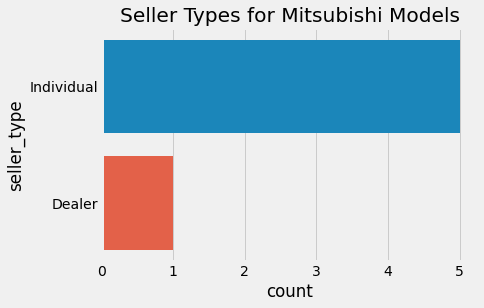

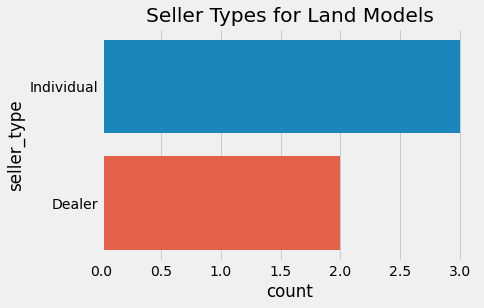

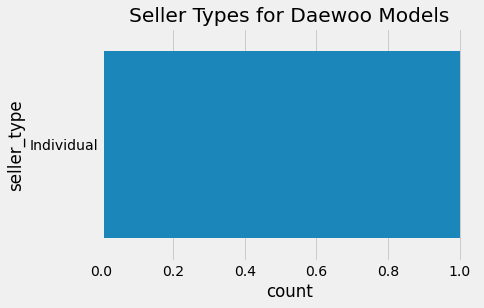

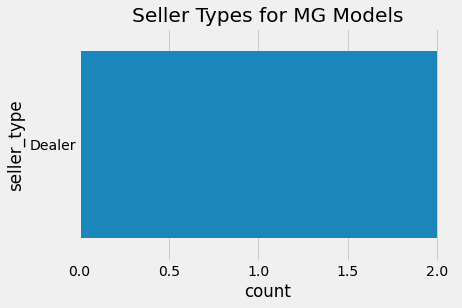

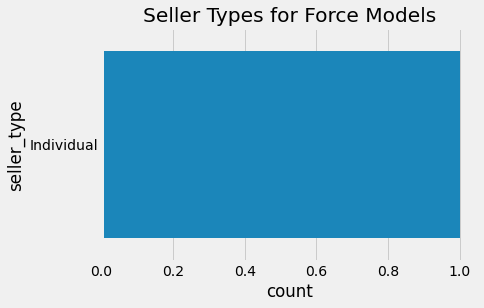

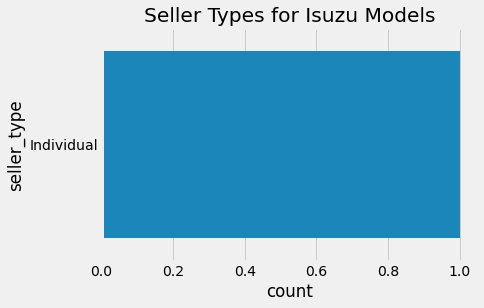

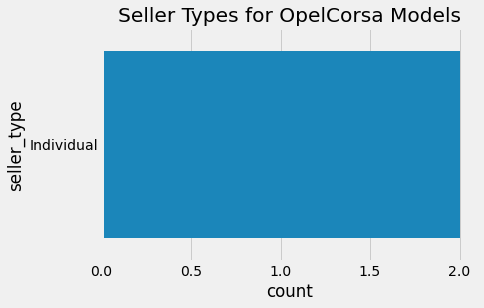

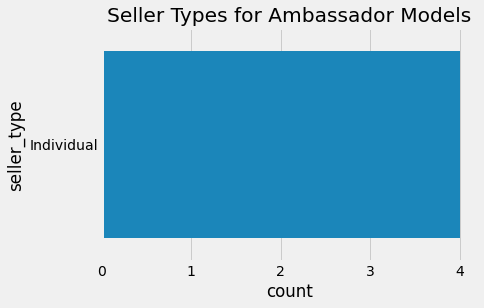

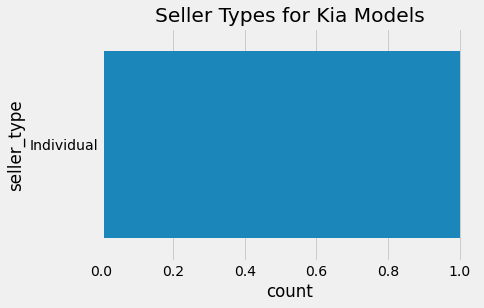

In [26]:
for i,car_model in enumerate(data.brand.unique()):
    plotting_data = data.loc[data.brand == car_model]
    sns.countplot(data=plotting_data, y="seller_type").set(title=f"Seller Types for {car_model} Models")
    plt.show()

> **Cars** are mostly put on sale by the **individual**

> **Honda, Ford, Vokswagen, Skolda, Jaguar, BMW, and Land** are also popularly put on sell from **Dealers**

**Summary!**

* Audi, Mercedes-Benz, and BMW vehicles' sale price are increasing every year
* Newer models are driven less than older car models, hence making them more valuable and increase their price
* Land, BMW, and Mercedes-Benz models are the most expensive
* Majority of the cars in the data set are owned by the first owner